# **Anticipation des besoins en consommation électrique de bâtiments**
*Sofia Chevrolat (Juillet 2020)*
___
Cette étude en deux notebooks vise à estimer les émissions de CO2 et la consommation totale d’énergie de bâtiments de la ville de Seattle en exploitant leurs données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..) mises à disposition par la ville pour les années 2015 et 2016.

___
_**Remerciements**:<br>
Merci à mon compagnon [J. Duplan](https://www.linkedin.com/in/julian-duplan-64844a41/) pour les discussions intéressantes.<br>
Merci également à mon mentor [Samia Drappeau](https://www.linkedin.com/in/samiadrappeau) pour les échanges d'idées, les conseils sur les graphiques et les encouragements!_
___

Cette étude est organisée en 2 notebooks: 
- Notebook de nettoyage, feature engineering et analyse exploratoire
- Notebook de modélisations et prédictions

___
## Notebook 2 : Modélisations et prédictions

Ce notebook est organisé comme suit:

**0. Mise en place**
- 0.1 Chargement des librairies et fonctions utiles
- 0.2 Chargement du jeu de données
- 0.3 Préparation pour la sélection des features
- 0.4 Choix du critère d'évaluation des modèles

**1. Prédiction de la consommation énergétique**
- 1.1 Sélection des features
- 1.2 Séparation du jeu de données
- 1.3 Choix de l'algorithme
    * 1.3.1 Instantiation et paramétrage des algorithmes de test
        * 1.3.1.1 Modèle 0 - Baseline : Régression linéaire simple
        * 1.3.1.2 Modèle 1 - Famille des modèles linéaires : ElasticNet
        * 1.3.1.3 Modèle 2 - Famille des machines à vecteurs de support : Support Vector Regressor
        * 1.3.1.4 Modèle 3 - Famille des plus proches voisins : K Neighbors Regressor
        * 1.3.1.5 Modèle 4 - Famille des modèles ensemblistes : Random Forest Regressor
    * 1.3.2 Comparaison des performances
    * 1.3.3 Conclusion : choix de l'algorithme
- 1.4 Choix des features
    * 1.4.1 Mise en place des features
        * 1.4.1.1 Features initiales + autres features les plus corrélées
        * 1.4.1.2 Features initales + proportions des sources d'énergie
        * 1.4.1.3 Features initiales + données de localisation
        * 1.4.1.4 Features initiales + types d'utilisation des bâtiments
        * 1.4.1.5 Features initiales + types de bâtiment
        * 1.4.1.6 Features initiales + type principal de propriété
    * 1.4.2 Comparaison des performances
    * 1.4.3 Conclusion : choix des features
- 1.5 Exploration des paramètres de l'algorithme
- 1.6 Validation du modèle

**2. Prédiction des émissions de CO2**
- 2.1 Sélection des features
- 2.2 Séparation du jeu de données
- 2.3 Choix de l'algorithme
    * 2.3.1 Instantiation et paramétrage des algorithmes de test
        * 2.3.1.1 Modèle 0 - Baseline : Régression linéaire simple
        * 2.3.1.2 Modèle 1 - Famille des modèles linéaires : ElasticNet
        * 2.3.1.3 Modèle 2 - Famille des machines à vecteurs de support : Support Vector Regressor
        * 2.3.1.4 Modèle 3 - Famille des plus proches voisins : K Neighbors Regressor
        * 2.3.1.5 Modèle 4 - Famille des modèles ensemblistes : Random Forest Regressor
    * 2.3.2 Comparaison des performances
    * 2.3.3 Conclusion : choix de l'algorithme
- 2.4 Choix des features
    * 2.4.1 Mise en place des features
        * 2.4.1.1 Features initiales + autres features les plus corrélées
        * 2.4.1.2 Features initiales + données de localisation
        * 2.4.1.3 Features initiales + types d'utilisation des bâtiments
        * 2.4.1.4 Features initiales + types de bâtiment
        * 2.4.1.5 Features initiales + type principal de propriété
    * 2.4.2 Comparaison des performances
    * 2.4.3 Conclusion : choix des features
- 2.5 Exploration des paramètres de l'algorithme
- 2.6 Validation du modèle


    
**3. Conclusion**

**4. Annexes**

___
### 0. MISE EN PLACE

Dans cette première étape, le cadre de travail est mis en place, c'est-à-dire :
- Les librairies et packages Python nécessaires sont chargés
- Les fonctions utiles sont définies
- Le jeu de données est chargé
___

___
#### 0.1 CHARGEMENT DES LIBRAIRIES ET FONCTIONS UTILES

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
import time

In [3]:
import helper_functions as hf

**_N.B : Le code des fonctions implémentées dans helper_functions dans le cadre de cette étude est également disponible en fin de notebook, section "Annexes"_**
___
#### 0.2 CHARGEMENT DU JEU DE DONNÉES

In [4]:
data = pd.read_csv("./sources/energy_data_2015-cleaned.csv", sep=",").iloc[:, 1:]

In [5]:
validation_data = pd.read_csv("./sources/energy_data_2016-cleaned.csv", sep=",").iloc[:, 1:]

___
#### 0.3 PRÉPARATIONS POUR LA SÉLECTION DES FEATURES

In [6]:
BT_cols = [col for col in data if col.startswith('BuildingType_')]
LPUT_cols = [col for col in data if col.startswith('LPUT_')]
LoAPUT_cols = [col for col in data if col.startswith('LoAPUT_')]
NB_cols = [col for col in data if col.startswith('Neighborhood_')]
PPT_cols = [col for col in data if col.startswith('PPT_')]
SN_cols = [col for col in data if col.startswith('SN_')]
CDC_cols = [col for col in data if col.startswith('CouncilDistrictCode_')]

___
#### 0.4 CHOIX DU CRITÈRE D'ÉVALUATION DES MODÈLES

On va choisir R2 et Root Mean Squared.

In [7]:
r2_rmse_time = pd.DataFrame()

____
### 1. PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE

___
#### 1.1 SÉLECTION DES FEATURES INITIALES

Dans un premier temps, on va s'intéresser uniquement aux variables les plus corrélées (coefficient de corrélation de Spearman > 50%) établies par l'analyse précédente, à savoir : 
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA

D'un point de vue métier, la proportion des différentes sources d'énergie utilisées par un bâtiment semble être un paramètre important. 
L'analyse a fait ressortir la prédominance de l'usage de l'électricité et du gaz naturel. Observons la distribution de ces 2 variables :

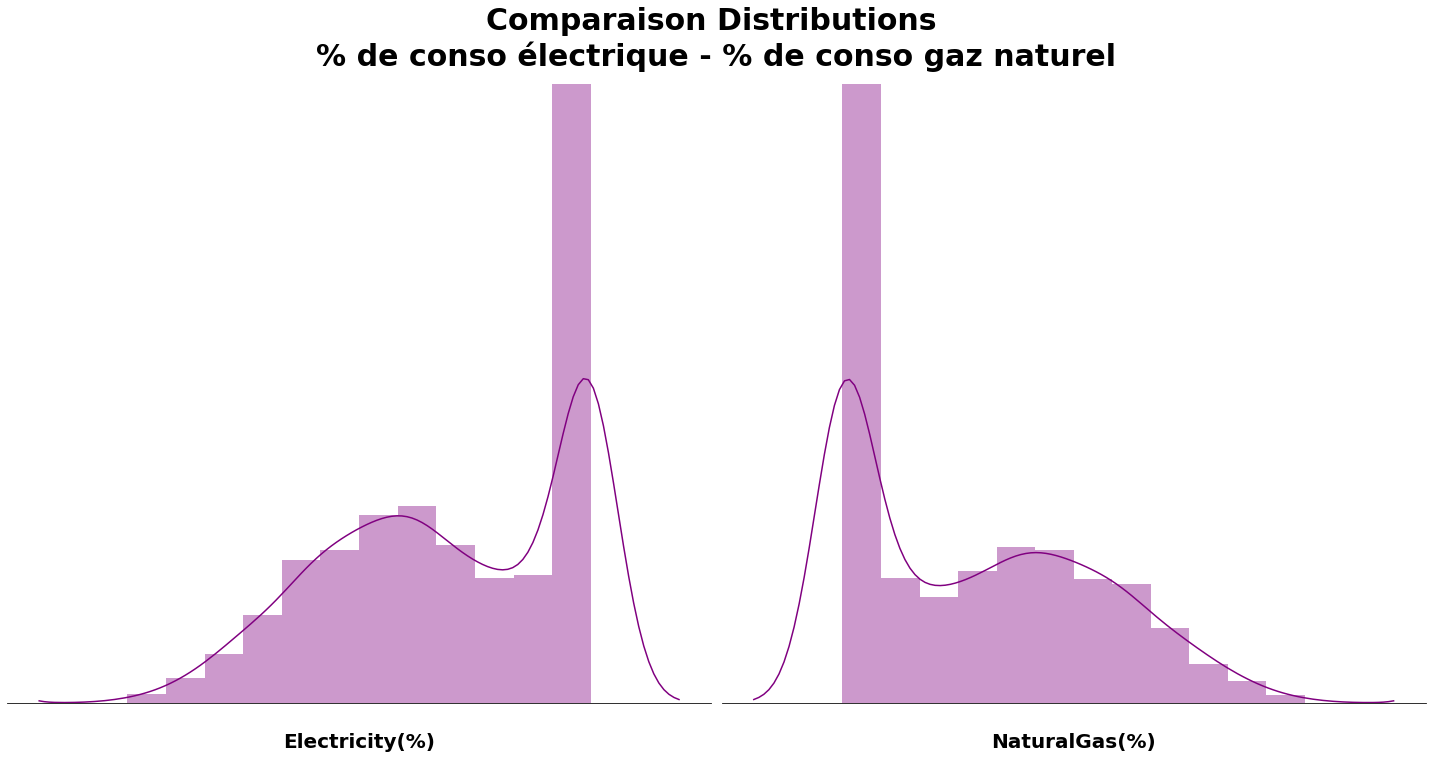

In [8]:
hf.plot2Distplots(data["Electricity(%)"], "Electricity(%)",
                  data["NaturalGas(%)"], "NaturalGas(%)",
                  20, 10, "Comparaison Distributions \n% de conso électrique - % de conso gaz naturel")

On observe une symétrie quasi-parfaite entre les 2 variables.
On pourrait donc n'inclure que l'une des 2 pour obtenir une image des proportions d'utilisation des 2 sources majoritaires.
Nous allons ici choisir la proportion d'utilisation d'électricité.

La liste des features initiales est donc la suivante : 
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- Electricity(%)

On inclura également biensûr la feature à prédire, à savoir SiteEnergyUse(kBtu).

In [9]:
data_consoNrj = data[["Electricity(%)", "PropertyGFABuilding(s)",
                      "LargestPropertyUseTypeGFA", "SiteEnergyUse(kBtu)"]]

In [10]:
validation_data_consoNrj = validation_data[["Electricity(%)", "PropertyGFABuilding(s)",
                                            "LargestPropertyUseTypeGFA", 
                                            "SiteEnergyUse(kBtu)"]]

___
#### 1.2 SÉPARATION DU JEU DE DONNÉES

On place l'ensemble des features autres que <i>SiteEnergyUse(kBtu)</i> dans le x, et la seule feature <i>SiteEnergyUse(kBtu)</i> dans y.

In [11]:
# Séparation du jeu de données en données d'entraînement et de test
xtrain, xtest, \
ytrain, ytest = train_test_split(data_consoNrj.loc[:, data_consoNrj.columns != 'SiteEnergyUse(kBtu)'], 
                                                data_consoNrj[["SiteEnergyUse(kBtu)"]], 
                                                test_size=0.3)

On crée une version standardisée des données, certains modèles donnant de meilleurs résultats sur les données standardisées.

In [12]:
# Standardisation des X
std_scale = preprocessing.StandardScaler().fit(xtrain)
xtrain_std = std_scale.transform(xtrain)
xtest_std = std_scale.transform(xtest)

In [13]:
# Passage au log des Y pour une meilleure distribution
ytrain_log = np.log(ytrain)
ytest_log = np.log(ytest)

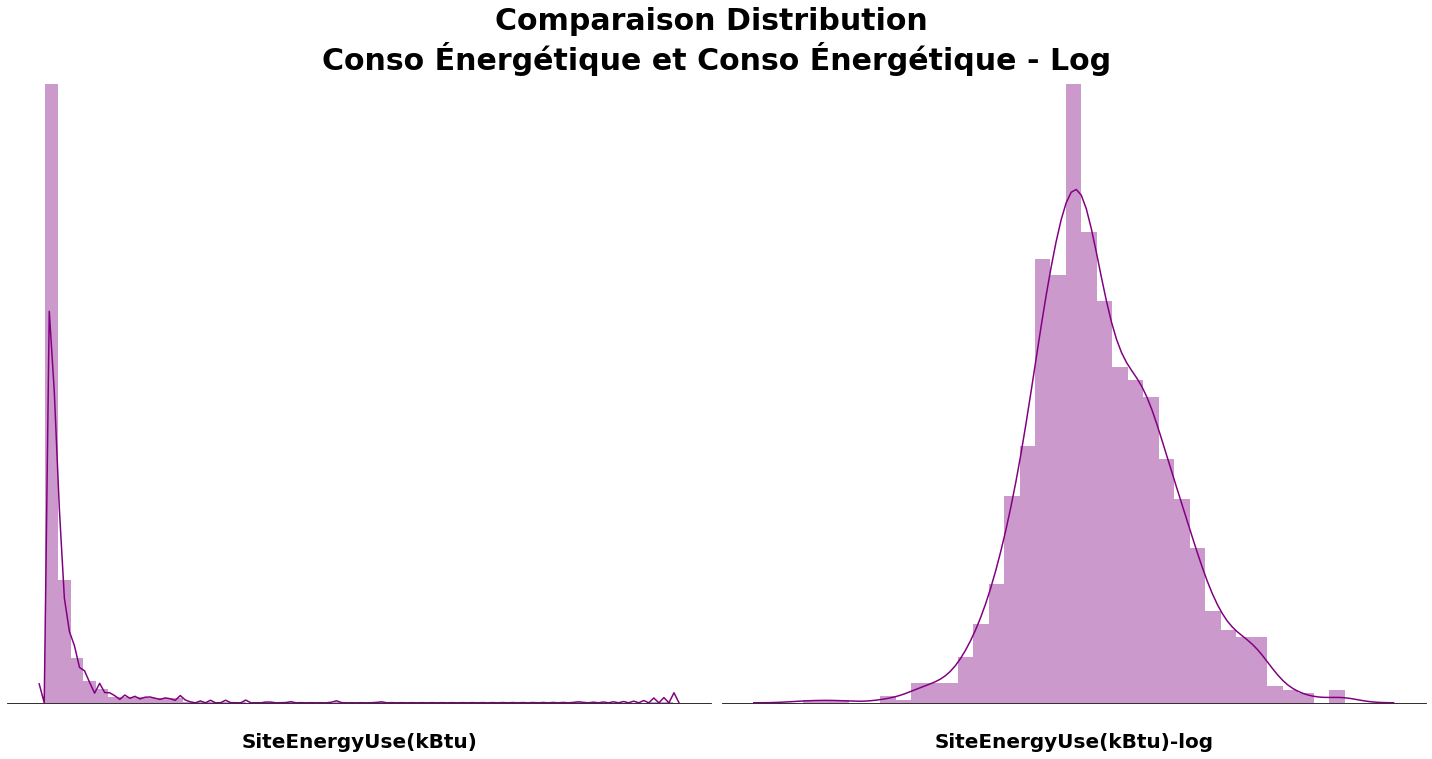

In [14]:
hf.plot2Distplots(data_consoNrj["SiteEnergyUse(kBtu)"], "SiteEnergyUse(kBtu)",
                  np.log(data_consoNrj["SiteEnergyUse(kBtu)"]), "SiteEnergyUse(kBtu)-log",
                  20, 10, "Comparaison Distribution \nConso Énergétique et Conso Énergétique - Log")

___
#### 1.3 CHOIX DE L'ALGORITHME

Plusieurs algorithmes de différentes familles seront testés afin de déterminer lequel se comporte le mieux face au problème posé.

___
##### _<u>1.3.1 Instantiation et paramétrage des algorithmes</u>_

___
###### 1.3.1.1 Algorithme 0 - Baseline : Régression linéaire simple

In [15]:
# Baseline : dummy regressor
baseline_regr = DummyRegressor(strategy="mean")

___
###### 1.3.1.2 Algorithme 1 - Famille des modèles linéaires : Elastic Net

**Input : données non standardisées**

In [16]:
alphas = [1e-7, 1e-2]

elastic_cv = ElasticNetCV(alphas=alphas, random_state=4)
model_elastic = elastic_cv.fit(xtrain, ytrain_log.values.ravel())

model_elastic.alpha_

1e-07

**Input : données standardisées**

In [17]:
# données standardisées
alphas = [1e-7, 1e-2]

elastic_cv = ElasticNetCV(alphas=alphas, random_state=4)
model_elastic_std = elastic_cv.fit(xtrain_std, ytrain_log.values.ravel())

model_elastic_std.alpha_

0.01

___
###### 1.3.1.3 Algorithme 2 - Famille des machines à vecteurs de support : Support Vector Regressor

**Input : données non standardisées**

In [18]:
parameters = {'gamma': [1e-7, 1e-2],'C':[1.5, 10], 'epsilon':[0.1,0.2,0.5,0.3]}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain,ytrain_log.values.ravel())
clf.best_params_

{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07}

In [19]:
model_svr = svm.SVR(gamma = clf.best_params_["gamma"],
                    C = clf.best_params_["C"],
                    epsilon = clf.best_params_["epsilon"])

**Input : données standardisées**

In [20]:
parameters = {'gamma': [1e-7, 1e-2],'C':[1.5, 10], 'epsilon':[0.1,0.2,0.5,0.3]}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain_std,ytrain_log.values.ravel())
clf.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 0.01}

In [21]:
model_svr_std = svm.SVR(gamma = clf.best_params_["gamma"],
                        C = clf.best_params_["C"],
                        epsilon = clf.best_params_["epsilon"])

___
##### 1.3.1.4 Algorithme 3 - Famille des plus proches voisins : K Neighbors Regressor

**Input : données non standardisées**

In [22]:
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]}]

clf = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
clf.fit(xtrain, ytrain_log)
clf.best_params_

{'n_neighbors': 30, 'weights': 'uniform'}

In [23]:
knr = neighbors.KNeighborsRegressor(n_neighbors = clf.best_params_["n_neighbors"], 
                                    weights = clf.best_params_["weights"])

**Input : données standardisées**

In [24]:
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]}]

clf = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
clf.fit(xtrain_std, ytrain_log)
clf.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

In [25]:
knr_std = neighbors.KNeighborsRegressor(n_neighbors = clf.best_params_["n_neighbors"], 
                                        weights=clf.best_params_["weights"])

___
###### 1.3.1.5 Algorithme 4 - Famille des modèles ensemblistes : Random Forest Regressor

**Input : données non standardisées**

In [26]:
parameters = [{'n_estimators': [100, 200, 500, 700, 1000]}]

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(xtrain, ytrain_log.values.ravel())
clf.best_params_

{'n_estimators': 700}

In [27]:
rfr = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], oob_score=True, random_state=4)

**Input : données standardisées**

In [28]:
parameters = [{'n_estimators': [100, 200, 500, 700, 1000]}]

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(xtrain_std, ytrain_log.values.ravel())
clf.best_params_

{'n_estimators': 100}

In [29]:
rfr_std = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], oob_score=True, random_state=4)

___
##### _<u>1.3.2 Comparaison des performances</u>_

In [30]:
estimators = {"Baseline - Dummy Regressor": baseline_regr, 
               "Baseline - Dummy Regressor - std": baseline_regr,
               "ElasticNet": model_elastic,
               "ElasticNet - std": model_elastic_std,
               "SVR": model_svr, 
               "SVR - std": model_svr_std,
               "KNR" : knr, 
               "KNR - std" : knr_std,
              "Random Forest Regressor" : rfr,
              "Random Forest Regressor - std" : rfr_std
             }

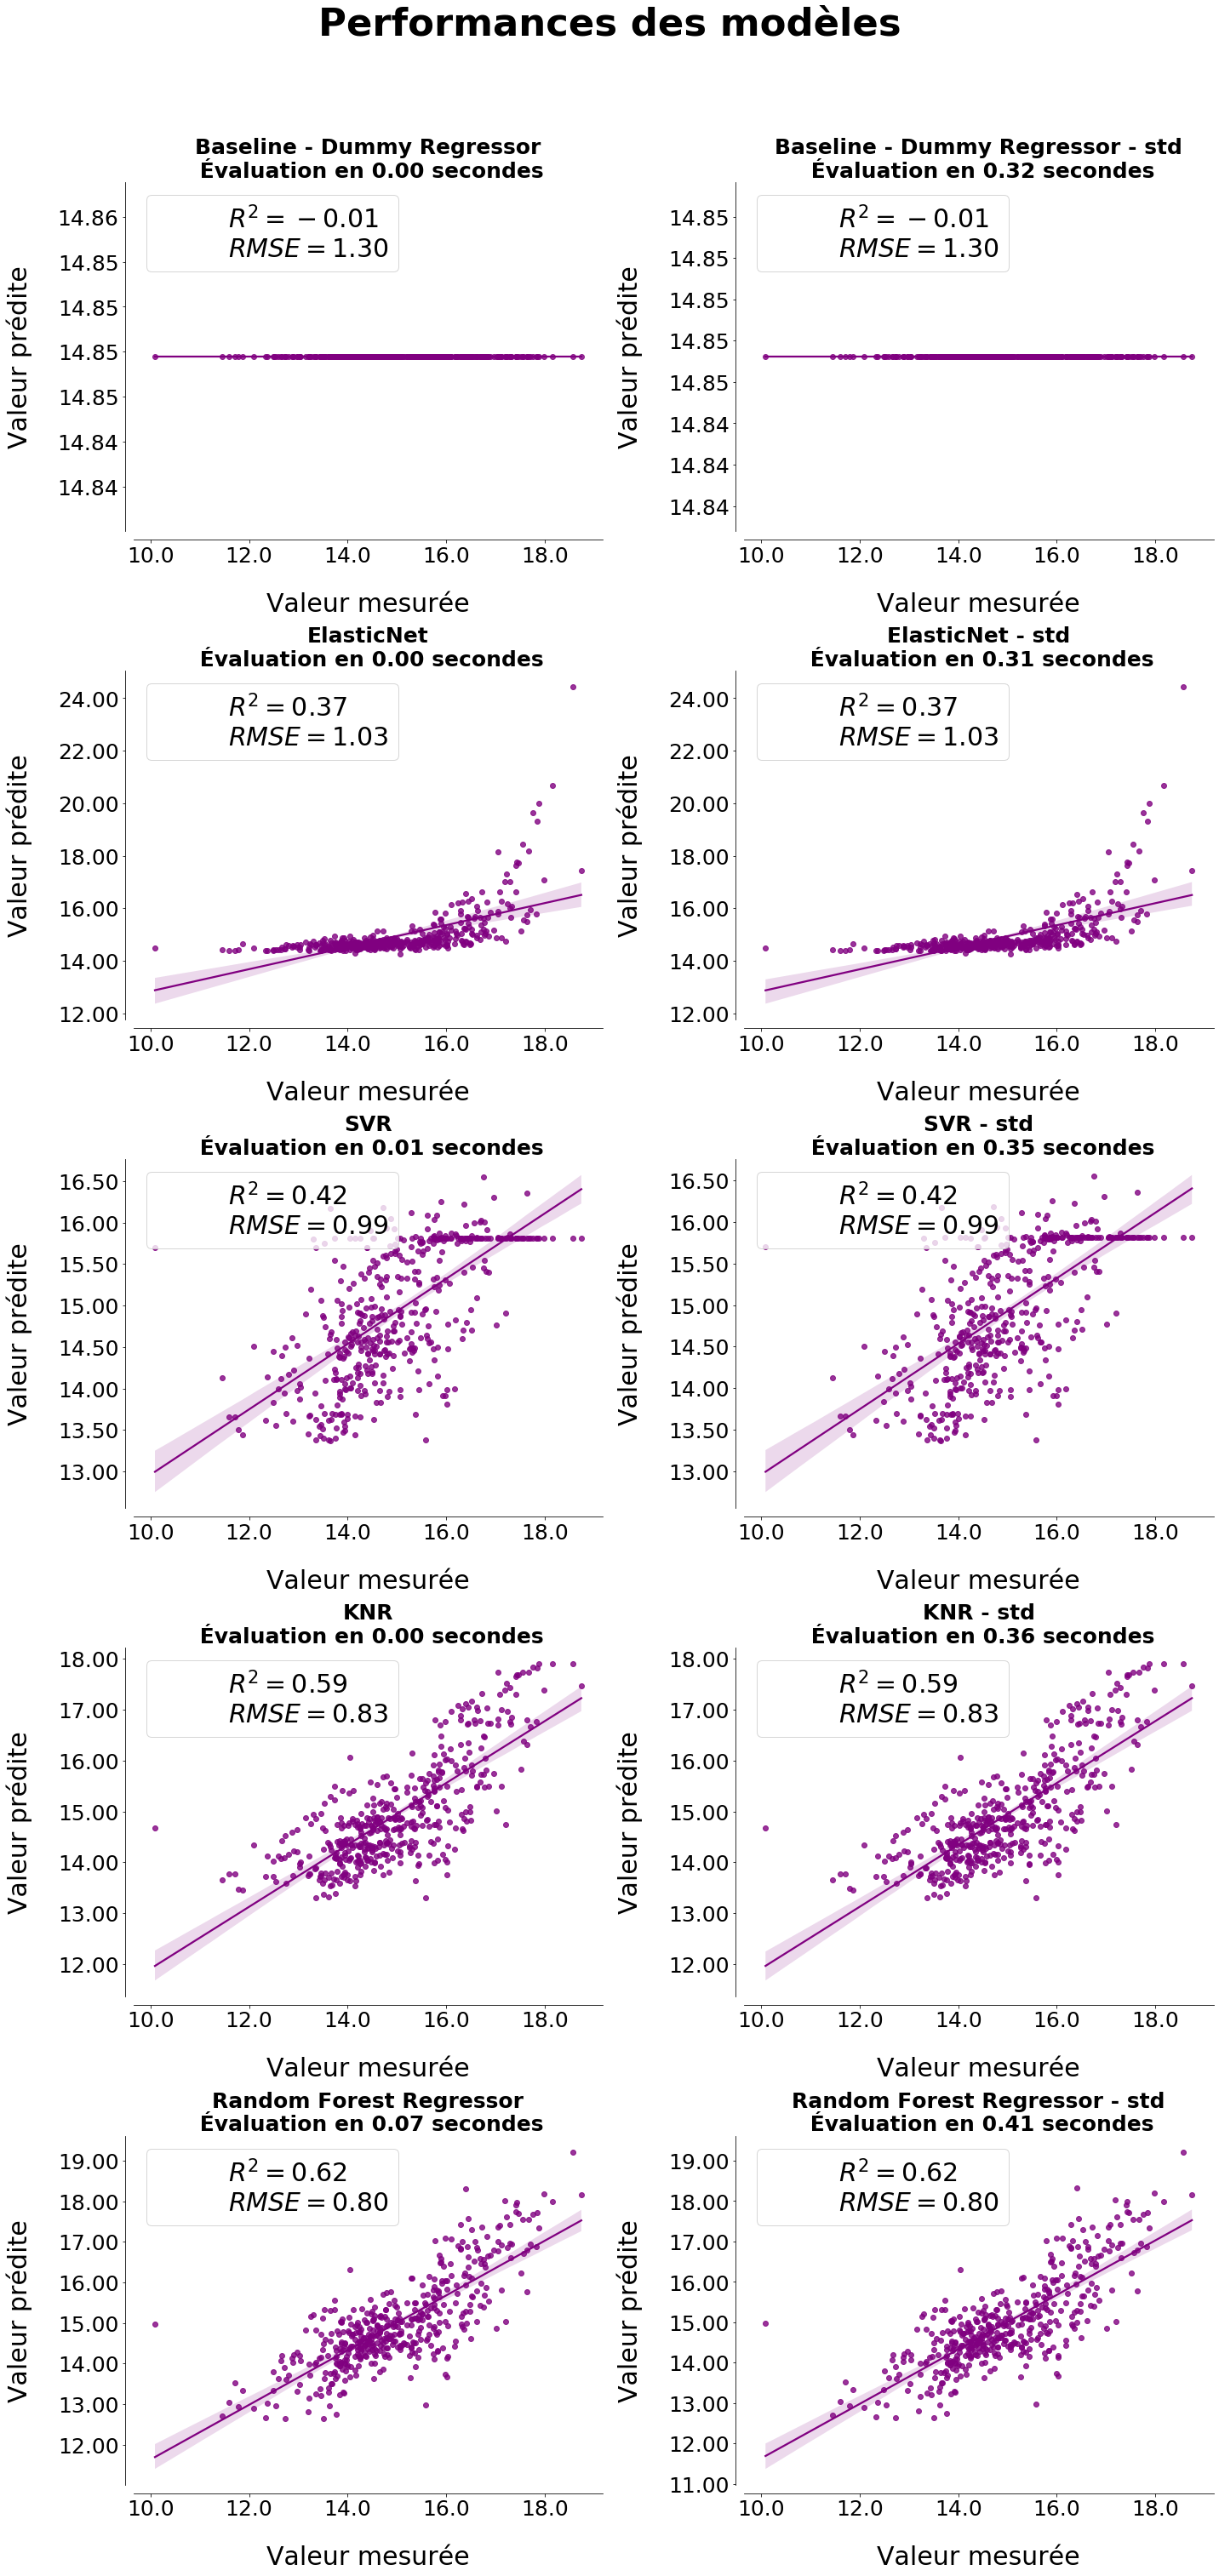

In [31]:
r2_rmse_time = hf.fitPredictPlot(estimators, xtrain, xtrain_std, ytrain_log, xtest, xtest_std, ytest_log)

Les différents algorithmes donnent les résultats suivants :

In [32]:
r2_rmse_time.sort_values(["RMSE", "R2", "Time"])

,RMSE,R2,Time
Random Forest Regressor,0.801139,0.618659,0.074043
Random Forest Regressor - std,0.801139,0.618659,0.408936
KNR,0.825935,0.594687,0.002616
KNR - std,0.825935,0.594687,0.356577
SVR,0.988676,0.419227,0.007502
SVR - std,0.988676,0.419227,0.348272
ElasticNet,1.026091,0.374439,0.000508
ElasticNet - std,1.026091,0.374439,0.309698
Baseline - Dummy Regressor,1.302733,-0.008345,0.000042
Baseline - Dummy Regressor - std,1.302733,-0.008345,0.320778


___
##### _<u>1.3.3 Conclusion : choix de l'algorithme</u>_

> **L'algorithme de Random Forest Regressor donne les meilleurs résultats (RMSE et R2).**
 
> **Nous utiliserons les données non standardisées en input.**

___
#### 1.4 CHOIX DES FEATURES

On va ajouter différents set de features aux features initiales pour voir si le modèle s'améliore.

In [33]:
r2_rmse_time = pd.DataFrame(r2_rmse_time.loc["Random Forest Regressor", :]).T

___
##### _<u>1.4.1 Mise en place des features</u>_

___
###### 1.4.1.1 Features initiales + autres features les plus corrélées

- NumberofFloors
- PropertyGFAParking
- LoAPUT_PARKING

SEUIL : 30 ---------------------

In [34]:
data_corr_30 = pd.concat([data_consoNrj, data[["NumberofFloors", 
                                               "PropertyGFAParking",
                                               "LoAPUT_PARKING"]]], axis=1)

- PPT_1
- YearBuilt
- PPT_5

SEUIL : 20 ---------------------

In [35]:
data_corr_20 = pd.concat([data_corr_30, data[["PPT_1",
                                              "YearBuilt",
                                              "PPT_5",
                                              ]]], axis=1)

___
###### 1.4.1.2 Features initiales + proportions des sources d'énergie

- NaturalGas(%)
- SteamUse(%)

In [36]:
data_nrj_sources = pd.concat([data_consoNrj, data[["NaturalGas(%)", "SteamUse(%)"]]], 
                             axis=1)

___
###### 1.4.1.3 Features initiales + données de localisation

- StreetNumber
- StreetName sous la forme des features SN
- ZipCode
- Neighborhood
- CouncilDistrictCode

In [37]:
data_loc = pd.concat([data_consoNrj, 
                      data[SN_cols],
                      data[NB_cols], 
                      data[CDC_cols], 
                      data[["StreetNumber", "ZipCode"]]], 
                     axis=1)

___
###### 1.4.1.4 Features initiales + types d'utilisation du bâtiment

- ListOfAllPropertyUseType sous la forme des features commençant par "LoAPUT"

In [38]:
data_loaput = pd.concat([data_consoNrj,
                         data[LoAPUT_cols]], 
                         axis=1)

___
###### 1.4.1.5 Features initiales + types de bâtiment

- BuildingType

In [39]:
data_bt = pd.concat([data_consoNrj,
                     data[BT_cols]], 
                     axis=1)

___
###### 1.4.1.6 Features initiales + type de propriété principal

- PrimaryPropertyType

In [40]:
data_ppt = pd.concat([data_consoNrj,
                     data[PPT_cols]], 
                     axis=1)

___
##### _<u>1.4.2 Comparaison des performances</u>_

In [41]:
datas_ajouts = {"Avec Features Corr - 30": data_corr_30,
                "Avec Features Corr - 20": data_corr_20,
                "Avec Proportions Sources NRJ": data_nrj_sources,
                "Avec Location": data_loc,
                "Avec ListOfAllPropertyUseType": data_loaput,
                "Avec BuildingType": data_bt,
                "Avec PrimaryPropertyType": data_ppt
}

In [42]:
(r2_rmse_time_add, rfr_df) = hf.getPerformances(datas_ajouts, "SiteEnergyUse(kBtu)",
                                                True)

In [43]:
r2_rmse_time = pd.concat([r2_rmse_time, r2_rmse_time_add])

In [44]:
r2_rmse_time.sort_values(["RMSE"]).fillna("-")

,RMSE,R2,Time,R2 Ajusté
Avec ListOfAllPropertyUseType,0.671043,-,2.563260,0.665482
Avec PrimaryPropertyType,0.685084,-,1.791014,0.690488
Avec Features Corr - 20,0.715988,-,4.043049,0.687835
Avec Location,0.790971,-,5.972778,0.618962
Random Forest Regressor,0.801139,0.618659,0.074043,-
Avec BuildingType,0.824348,-,0.640109,0.536048
Avec Features Corr - 30,0.874965,-,1.785525,0.550536
Avec Proportions Sources NRJ,0.879528,-,1.747105,0.58328


___
##### _<u>1.4.3 Conclusion : choix des features</u>_

Les features donnant les meilleurs résultats sont les features initales + l'ensemble des usages du bâtiment.

In [45]:
print(len(data_loaput.columns))

70


In [46]:
print(len(data_corr_20.columns))

10


In [47]:
print(len(data_corr_30.columns))

7


In [48]:
print(len(data_bt.columns))

9


In [49]:
print(len(data_loc.columns))

32


In [50]:
print(len(data_nrj_sources.columns))

6


In [51]:
print(len(data_ppt.columns))

10


On récupère le meilleur modèle.

In [53]:
best_model = rfr_df.loc[0, "Avec ListOfAllPropertyUseType"]

___
#### 1.5 EXPLORATION DES PARAMÈTRES DE L'ALGORITHME

On va tenter d'améliorer les performances du modèle en modifiant certains paramères de l'algorithme.

In [54]:
r2_rmse_time = pd.DataFrame(r2_rmse_time.loc["Avec ListOfAllPropertyUseType", :]).T
r2_rmse_time["R2"] = r2_rmse_time["R2 Ajusté"]
r2_rmse_time["R2 Ajusté"] = "-"

In [55]:
xtrain, xtest, \
ytrain, ytest = train_test_split(data_loaput.loc[:,data_loaput.columns != 'SiteEnergyUse(kBtu)'], 
                                 data_loaput[["SiteEnergyUse(kBtu)"]], 
                                 test_size=0.3)

ytrain_log = np.log(ytrain)
ytest_log = np.log(ytest)

On va récupérer le nombre d'estimateur de l'algorithme choisi et l'indiquer au GridSearchCV :

In [56]:
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=4, verbose=0, warm_start=False)

In [57]:
n_estimators = 500

In [58]:
parameters = [{'n_estimators': [n_estimators],
                'max_depth': range(5, 1000, 100),
                'max_samples': range(5, 580, 100)}]

clf = GridSearchCV(RandomForestRegressor(),
                   parameters)

clf.fit(xtrain, ytrain_log.values.ravel())

clf.best_params_

{'max_depth': 105, 'max_samples': 505, 'n_estimators': 500}

In [59]:
rfr = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], 
                            max_depth=clf.best_params_["max_depth"],
                            max_samples=clf.best_params_["max_samples"],
                            oob_score=True, 
                            random_state=4)

In [60]:
rfr.fit(xtrain, ytrain_log.values.ravel())

start_time = time.time()

ypred = rfr.predict(xtest)
            
elapsed_time = time.time() - start_time

r2_rmse_time.loc["Optimised RFR", "RMSE"] = np.sqrt(mean_squared_error(ytest_log, ypred))
r2_rmse_time.loc["Optimised RFR", "R2"] = r2_score(ytest_log, ypred)
r2_rmse_time.loc["Optimised RFR", "Time"] = elapsed_time

In [61]:
r2_rmse_time.sort_values(["RMSE"]).fillna("-")

,RMSE,R2,Time,R2 Ajusté
Avec ListOfAllPropertyUseType,0.671043,0.665482,2.563260,-
Optimised RFR,0.704325,0.687693,0.050152,-


Les résultats ne sont pas concluants. On conserve donc les paramètres précédents.

___
#### 1.6 VALIDATION DU MODÈLE

On va fournir les données de l'année 2016 encore jamais vues à l'algorithme et évaluer sa performance sur celles-ci.

In [62]:
validation_data_loaput = pd.concat([validation_data_consoNrj, 
                                     validation_data[LoAPUT_cols]], axis=1)

In [63]:
start_time = time.time()

ypred = best_model.predict(validation_data_loaput.loc[:, 
                           validation_data_loaput.columns != 'SiteEnergyUse(kBtu)'])

elapsed_time = time.time() - start_time

In [64]:
y_log = np.log(validation_data_loaput["SiteEnergyUse(kBtu)"])

r2_rmse_time = pd.DataFrame()
r2_rmse_time.loc["Validation", "RMSE"] = np.sqrt(mean_squared_error(y_log, ypred))
r2_rmse_time.loc["Validation", "R2"] = r2_score(y_log, ypred)
r2_rmse_time.loc["Validation", "Time"] = elapsed_time

In [65]:
r2_rmse_time.sort_values(["RMSE"]).fillna("-")

,RMSE,R2,Time
Validation,0.564974,0.805271,0.128483


In [66]:
data_to_plot = pd.DataFrame(columns=["Log SiteEnergyUse(kBtu) - PREDITES", 
                                     "Log SiteEnergyUse(kBtu) - MESUREES"])
data_to_plot["Log SiteEnergyUse(kBtu) - PREDITES"] = ypred
data_to_plot["Log SiteEnergyUse(kBtu) - MESUREES"] = y_log

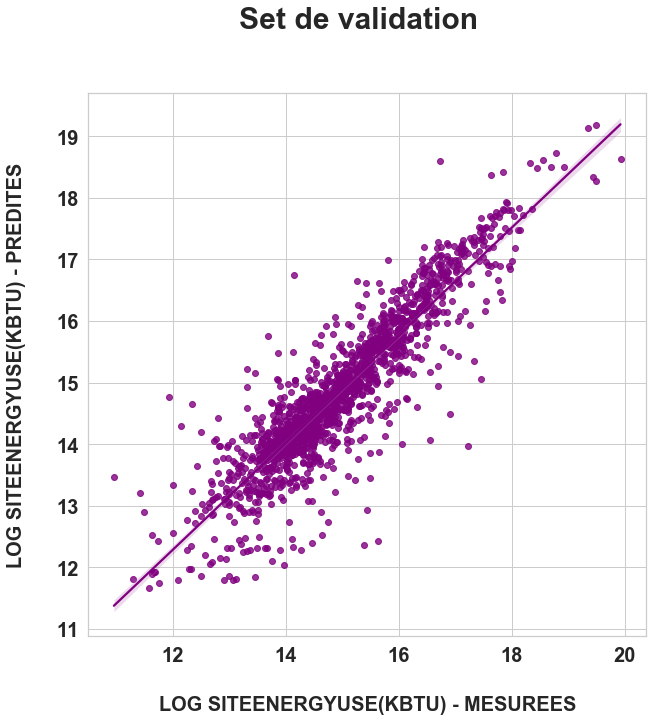

In [67]:
hf.plotRegplot(data_to_plot["Log SiteEnergyUse(kBtu) - MESUREES"], 
               data_to_plot["Log SiteEnergyUse(kBtu) - PREDITES"], 
               "Set de validation", 10, 10)

____
### 2. PRÉDICTION DES ÉMISSIONS DE CARBONE

____
#### 2.1 SÉLECTION DES FEATURES

Comme dans le cas de la consommation énergétique, on va dans un premier temps s'intéresser uniquement aux variables les plus corrélées (coefficient de corrélation de Spearman > 50%) établies par l'analyse précédente, à savoir :

- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA

Pour les mêmes raisons que précédemment, nous allons inclure la proportion d'utilisation d'électricité.

La liste des features initiales est donc la suivante : 
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- Electricity(%)

On inclura également biensûr la feature à prédire, à savoir TotalGHGEmissions.

In [68]:
data_emCO2 = data[["Electricity(%)", 
                   "PropertyGFABuilding(s)",
                   "LargestPropertyUseTypeGFA",
                   "TotalGHGEmissions"]]

In [69]:
validation_data_emCO2 = validation_data[["Electricity(%)",
                                         "PropertyGFABuilding(s)", 
                                         "LargestPropertyUseTypeGFA",
                                         "TotalGHGEmissions"]]

____
#### 2.2 SÉPARATION DU JEU DE DONNÉES

On place l'ensemble des features autres que <i>TotalGHGEmissions</i> dans le x, et la seule feature <i>TotalGHGEmissions</i> dans y.

In [70]:
# Séparation du jeu de données en données d'entraînement et de test
xtrain, xtest, \
ytrain, ytest = train_test_split(data_emCO2.loc[:, data_emCO2.columns != 'TotalGHGEmissions'], 
                                                data_emCO2[["TotalGHGEmissions"]], 
                                                test_size=0.3)

On crée une version standardisée des données, certains modèles donnant de meilleurs résultats sur les données standardisées.

In [71]:
# Standardisation des X
std_scale = preprocessing.StandardScaler().fit(xtrain)
xtrain_std = std_scale.transform(xtrain)
xtest_std = std_scale.transform(xtest)

TotalGHGEmissions possède une distribution peu équilibrée. 

Pour pallier à cela, et obtenir ainsi potentiellement des modèles plus performants, nous allons effectuer un passage au log.

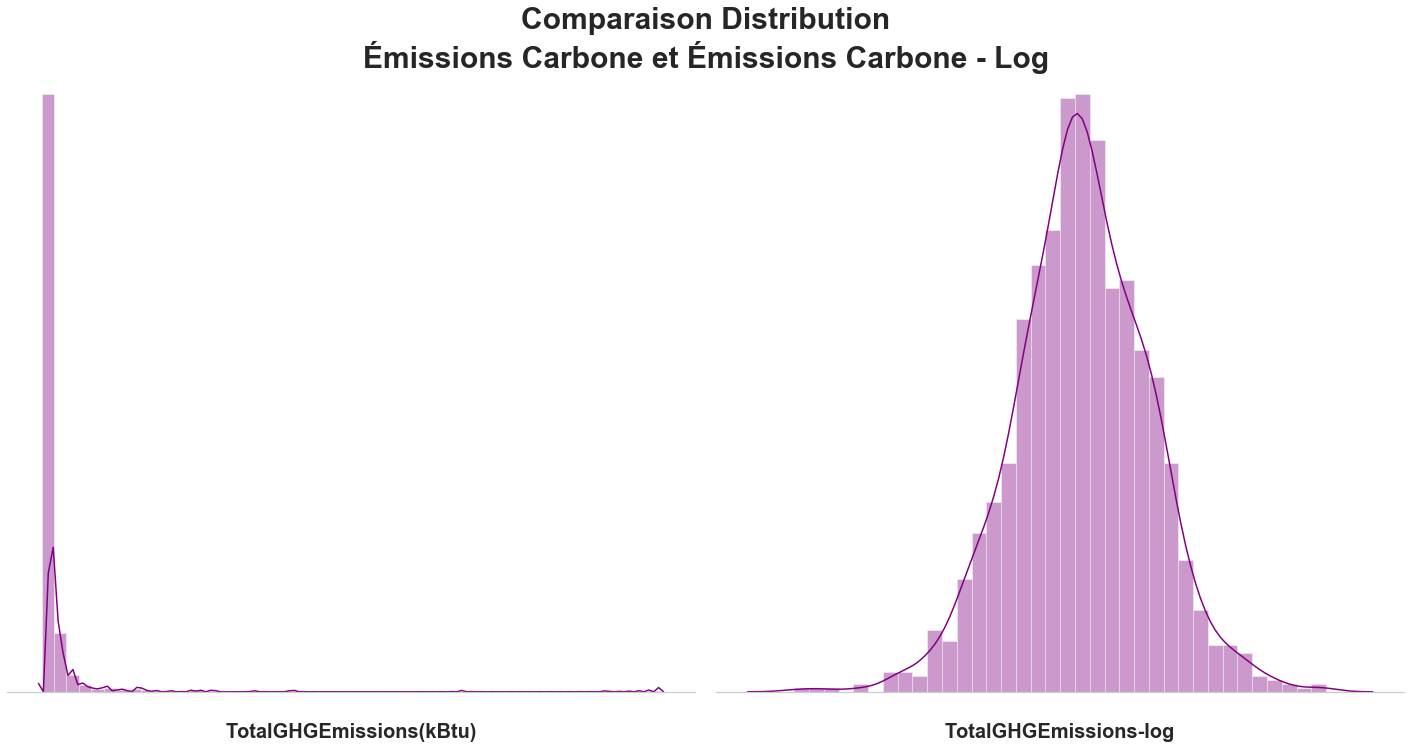

In [72]:
hf.plot2Distplots(data_emCO2["TotalGHGEmissions"], "TotalGHGEmissions(kBtu)",
                  np.log(data_emCO2["TotalGHGEmissions"]), "TotalGHGEmissions-log",
                  20, 10, "Comparaison Distribution\nÉmissions Carbone et Émissions Carbone - Log")

In [73]:
# Passage au log des Y pour une meilleure distribution
ytrain_log = np.log(ytrain)
ytest_log = np.log(ytest)

____
#### 2.3 CHOIX DE L'ALGORITHME

Plusieurs algorithmes de différentes familles seront testés afin de déterminer lequel se comporte le mieux face au problème posé.

___
##### _<u>2.3.1 Instantiation et paramétrage des algorithmes de test</u>_

___
###### 2.3.1.1 Algorithme 0 - Baseline : Régression linéaire simple

In [74]:
# Baseline : linear regression
baseline_regr = DummyRegressor(strategy="mean")

___
###### 2.3.1.2 Algorithme 1 - Famille des modèles linéaires : ElasticNet

**Input : données non standardisées**

In [75]:
# données non standardisées 
alphas = [0.3, 0.5, 1, 3, 5, 6, 7, 8, 9, 10, 15, 100, 150, 500, 1000]

elastic_cv = ElasticNetCV(alphas=alphas, random_state=4)
model_elastic = elastic_cv.fit(xtrain, ytrain_log.values.ravel())

model_elastic.alpha_

0.3

**Input : données standardisées**

In [76]:
# données standardisées
alphas = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1, 10]

elastic_cv = ElasticNetCV(alphas=alphas, random_state=4)
model_elastic_std = elastic_cv.fit(xtrain_std, ytrain_log.values.ravel())

model_elastic_std.alpha_

0.03

___
###### 2.3.1.3 Algorithme 2 - Famille des machines à vecteur de support : Support Vector Regression

**Input : données non standardisées**

In [77]:
parameters = {'gamma': [1e-7, 1e-2],'C':[1.5, 10], 'epsilon':[0.1,0.2,0.5,0.3]}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain,ytrain_log.values.ravel())
clf.best_params_

{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07}

In [78]:
model_svr = svm.SVR(gamma = clf.best_params_["gamma"],
                    C = clf.best_params_["C"],
                    epsilon = clf.best_params_["epsilon"])

**Input : données standardisées**

In [79]:
parameters = {'gamma': [1e-7, 1e-2],'C':[1.5, 10], 'epsilon':[0.1,0.2,0.5,0.3]}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain_std,ytrain_log.values.ravel())
clf.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.01}

In [80]:
model_svr_std = svm.SVR(gamma = clf.best_params_["gamma"],
                        C = clf.best_params_["C"],
                        epsilon = clf.best_params_["epsilon"])

___
###### 2.3.1.4 Algorithme 3 - Famille des plus proches voisins : K Neighbors Regressor

**Input : Données non standardisées**

In [81]:
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]}]

clf = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
clf.fit(xtrain, ytrain_log)
clf.best_params_

{'n_neighbors': 60, 'weights': 'uniform'}

In [82]:
knr = neighbors.KNeighborsRegressor(n_neighbors = clf.best_params_["n_neighbors"], 
                                    weights = clf.best_params_["weights"])

**Input : données standardisées**

In [83]:
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]}]

clf = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
clf.fit(xtrain_std, ytrain_log)
clf.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

In [84]:
knr_std = neighbors.KNeighborsRegressor(n_neighbors = clf.best_params_["n_neighbors"], 
                                        weights=clf.best_params_["weights"])

___
###### 2.3.1.5 Algorithme 4 - Famille des modèles ensemblistes : Random Forest Regressor

**Input : données non standardisées**

In [85]:
parameters = [{'n_estimators': [100, 200, 500, 700, 1000]}]

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(xtrain, ytrain_log.values.ravel())
clf.best_params_

{'n_estimators': 200}

In [86]:
rfr = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], oob_score=True, random_state=4)

**Input : données standardisées**

In [87]:
parameters = [{'n_estimators': [100, 200, 500, 700, 1000]}]

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(xtrain_std, ytrain_log.values.ravel())
clf.best_params_

{'n_estimators': 700}

In [88]:
rfr_std = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], 
                                oob_score=True, random_state=4)

___
##### _<u>2.3.2 Comparaison des performances</u>_

In [89]:
estimators = {"Baseline - Dummy Regressor (mean)": baseline_regr, 
               "Baseline - Dummy Regressor (mean) - std": baseline_regr,
               "ElasticNet": model_elastic,
               "ElasticNet - std": model_elastic_std,
               "SVR": model_svr, 
               "SVR - std": model_svr_std,
               "KNR" : knr, 
               "KNR - std" : knr_std,
              "Random Forest Regressor" : rfr,
              "Random Forest Regressor - std" : rfr_std
             }

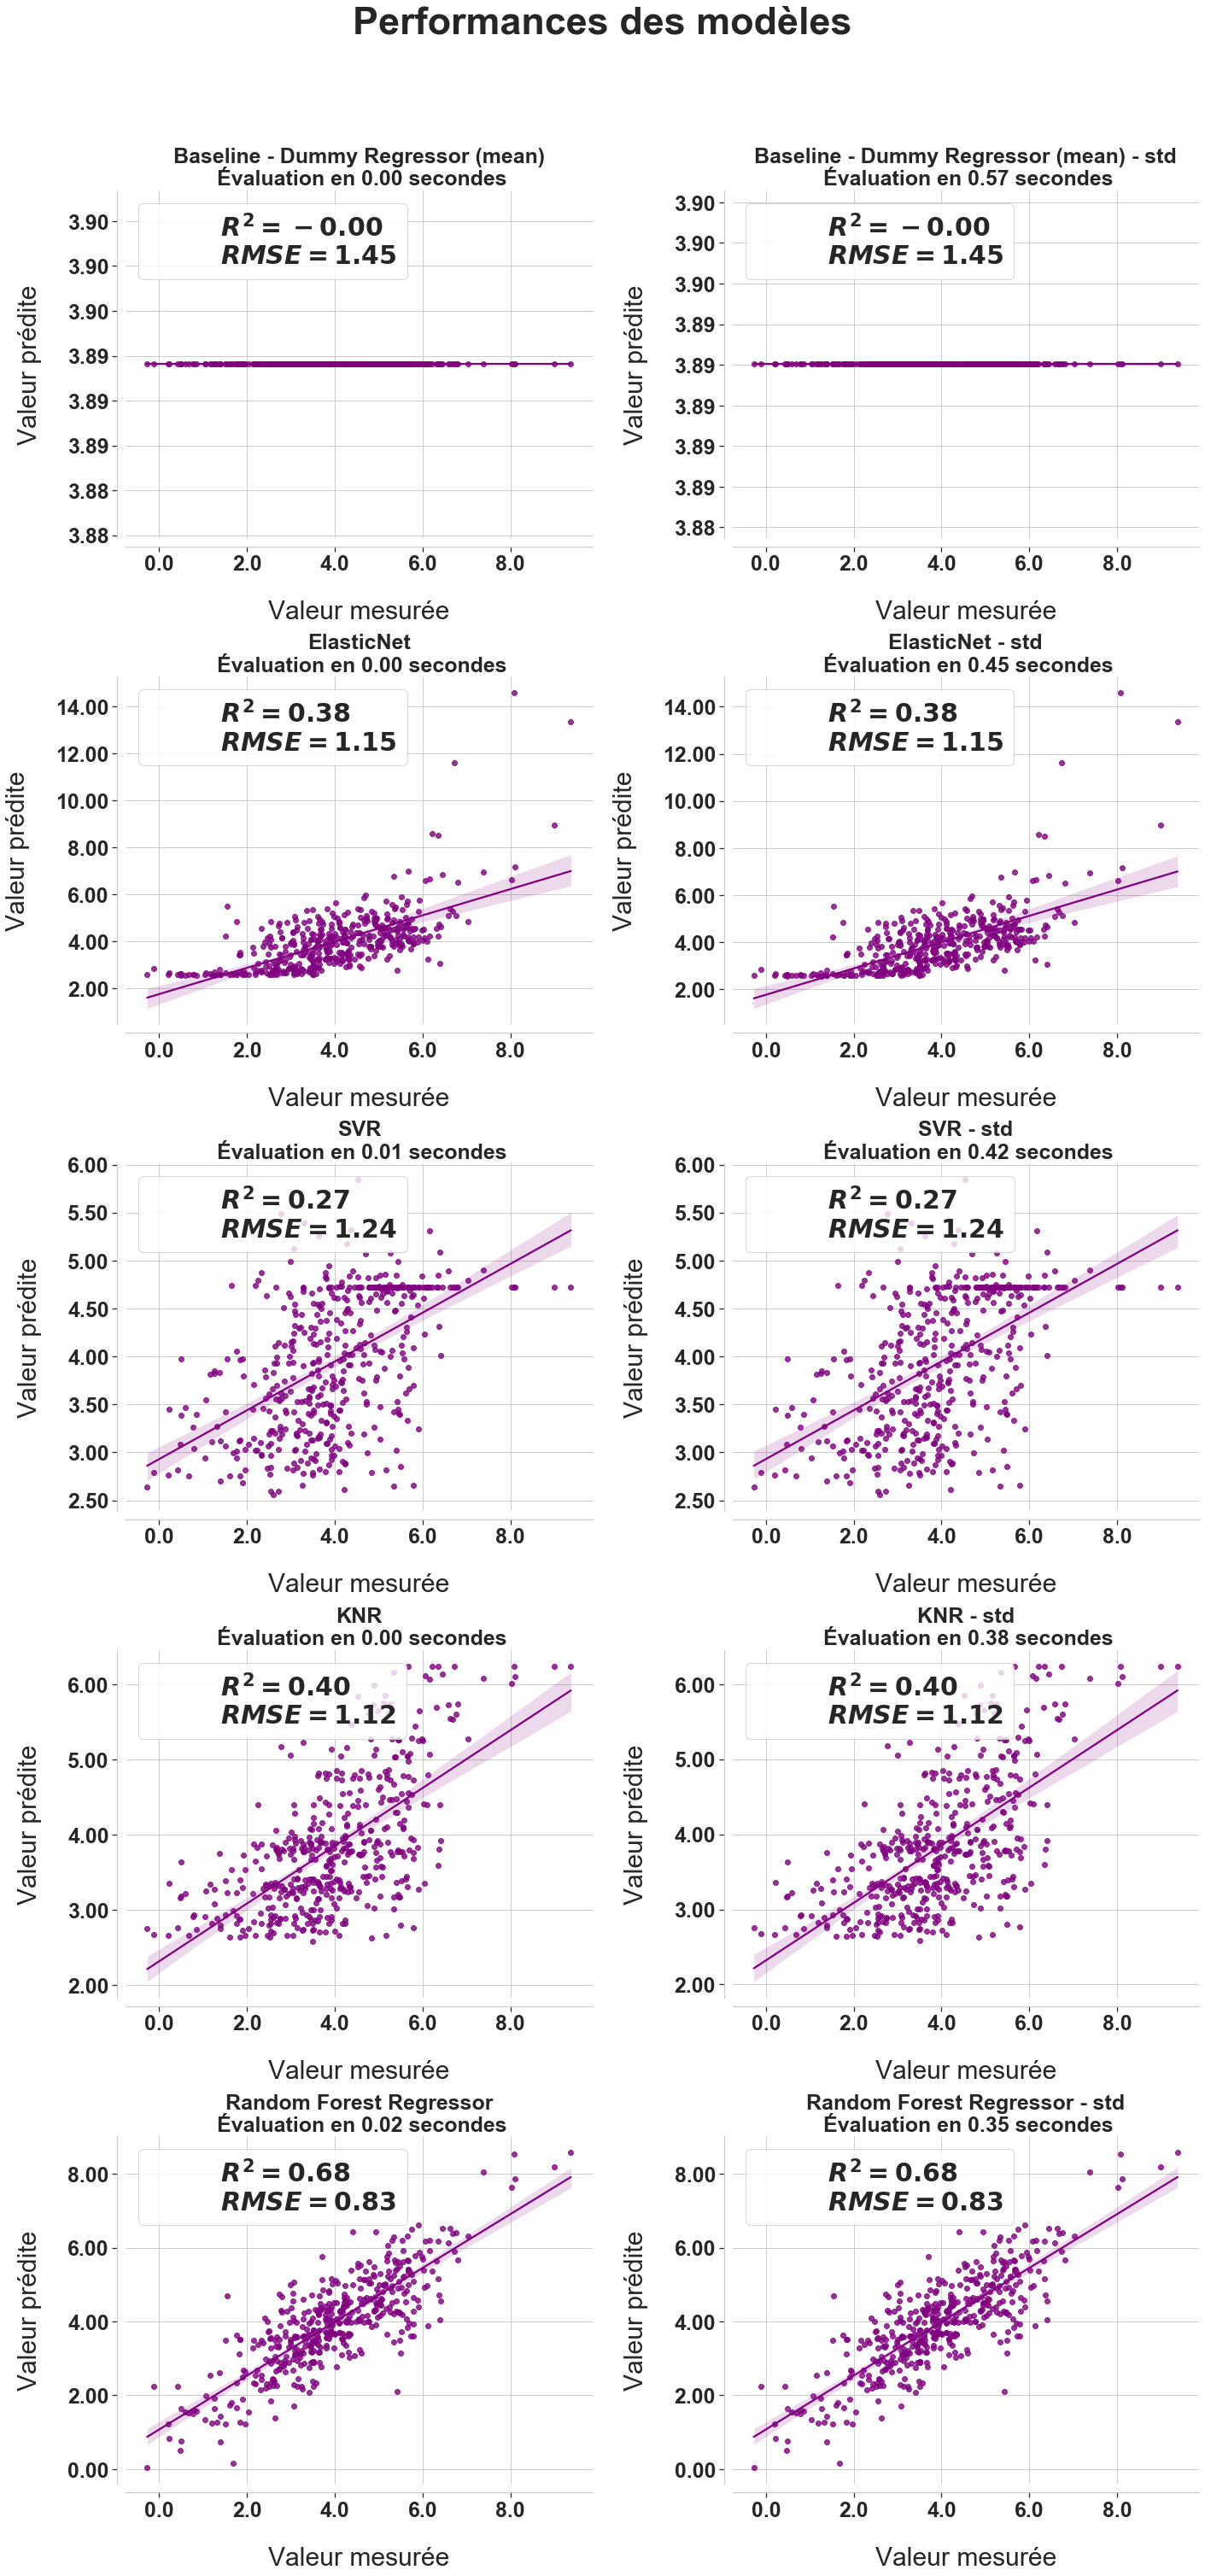

In [90]:
r2_rmse_time = hf.fitPredictPlot(estimators, xtrain, xtrain_std, ytrain_log, xtest, xtest_std, ytest_log)

Les différents algorithmes donnent les résultats suivants :

In [91]:
r2_rmse_time.sort_values(["RMSE", "R2", "Time"])

,RMSE,R2,Time
Random Forest Regressor,0.825600,0.676136,0.022589
Random Forest Regressor - std,0.825600,0.676136,0.349189
KNR,1.124417,0.399273,0.004637
KNR - std,1.124417,0.399273,0.378297
ElasticNet,1.145402,0.376641,0.000511
ElasticNet - std,1.145402,0.376641,0.454025
SVR,1.242388,0.266607,0.005766
SVR - std,1.242388,0.266607,0.421819
Baseline - Dummy Regressor (mean),1.452083,-0.001857,0.000047
Baseline - Dummy Regressor (mean) - std,1.452083,-0.001857,0.567837


___
##### _<u>2.3.3 Conclusion : choix de l'algorithme</u>_

> **L'algorithme de Random Forest Regressor donne les meilleurs résultats (RMSE et R2).**

> **Nous utiliserons les données non standardisées en input.**

____
#### 2.4 CHOIX DES FEATURES

On va ajouter différents set de features aux features initiales pour voir si le modèle s'améliore.

___
##### _<u>2.4.1 Mise en place des features</u>_

In [92]:
r2_rmse_time = pd.DataFrame(r2_rmse_time.loc["Random Forest Regressor", :]).T

___
###### 2.4.1.1 Features initiales + autres features les plus corrélées

- NaturalGas(%)
- PPT_1

SEUIL : 30 ---------------------

In [93]:
data_corr_30 = pd.concat([data_emCO2, data[["NaturalGas(%)",
                                            "PPT_1"]]], axis=1)

- SteamUse(%)
- NumberofFloors

SEUIL : 20 ---------------------

In [94]:
data_corr_20 = pd.concat([data_corr_30, data[["SteamUse(%)", "NumberofFloors"]]], 
                         axis=1)

___
###### 2.4.1.2 Features initiales + données d'emplacement

- StreetNumber
- StreetName sous la forme des features SN
- ZipCode
- Neighborhood
- CouncilDistrictCode

In [95]:
data_loc = pd.concat([data_emCO2, 
                      data[[col for col in data if col.startswith('SN_')]],
                      data[[col for col in data if col.startswith('Neighborhood_')]], 
                      data[[col for col in data if col.startswith('CouncilDistrictCode_')]], 
                      data[["StreetNumber", "ZipCode"]]], 
                     axis=1)

___
###### 2.4.1.3 Features initiales + types d'utilisation des bâtiments

- ListOfAllPropertyUseType sous la forme des features commençant par "LoAPUT"

In [96]:
data_loaput = pd.concat([data_emCO2,
                         data[[col for col in data if col.startswith('LoAPUT_')]]], 
                         axis=1)

___
###### 2.4.1.4 Features initiales + type de bâtiment

- BuildingType

In [97]:
data_bt = pd.concat([data_emCO2,
                     data[[col for col in data if col.startswith('BuildingType_')]]], 
                     axis=1)

___
###### 2.4.1.5 Features initiales + type principal de propriété

- PrimaryPropertyType

In [98]:
data_ppt = pd.concat([data_emCO2,
                     data[PPT_cols]], 
                     axis=1)

___
##### _<u>2.4.2 Comparaison des performances</u>_

In [99]:
datas_ajouts = {"Avec Features Corr - 30": data_corr_30,
                "Avec Features Corr - 20": data_corr_20,
                "Avec Location": data_loc,
                "Avec ListOfAllPropertyUseType": data_loaput,
                "Avec BuildingType": data_bt, 
                "Avec PrimaryPropertyType": data_ppt
}

In [100]:
(r2_rmse_time_add, rfr_df) = hf.getPerformances(datas_ajouts, "TotalGHGEmissions", 
                                                r2_adjusted=True)

In [101]:
r2_rmse_time = pd.concat([r2_rmse_time, r2_rmse_time_add])

In [102]:
r2_rmse_time.sort_values(["RMSE"]).fillna("-")

,RMSE,R2,Time,R2 Ajusté
Avec ListOfAllPropertyUseType,0.714505,-,3.213872,0.733848
Avec Features Corr - 20,0.716565,-,0.707015,0.769013
Avec PrimaryPropertyType,0.726873,-,3.510563,0.767234
Avec Features Corr - 30,0.785294,-,0.679755,0.712402
Random Forest Regressor,0.825600,0.676136,0.022589,-
Avec BuildingType,0.834537,-,1.453346,0.688274
Avec Location,0.858085,-,3.867931,0.665952


___
##### _<u>2.4.3 Conclusion : choix des features</u>_

Le meilleur modèle est donc celui des features initales + données de types d'utilisation.

In [103]:
print(len(data_corr_30.columns))

6


In [104]:
print(len(data_loaput.columns))

70


In [105]:
print(len(data_corr_20.columns))

8


In [106]:
print(len(data_loc.columns))

32


In [107]:
print(len(data_emCO2.columns))

4


In [108]:
print(len(data_bt.columns))

9


In [109]:
print(len(data_ppt.columns))

10


In [110]:
best_model = rfr_df.loc[0, "Avec ListOfAllPropertyUseType"]

___
#### 2.5 EXPLORATION DES PARAMÈTRES

On va tenter d'améliorer les performances du modèle en modifiant certains paramères de l'algorithme.

In [111]:
r2_rmse_time = pd.DataFrame(r2_rmse_time.loc["Avec ListOfAllPropertyUseType", :]).T
r2_rmse_time["R2"] = r2_rmse_time["R2 Ajusté"]
r2_rmse_time["R2 Ajusté"] = "-"

In [112]:
xtrain, xtest, \
ytrain, ytest = train_test_split(data_loaput.loc[:,data_loaput.columns != 'TotalGHGEmissions'],
                                 data_loaput[["TotalGHGEmissions"]],
                                 test_size=0.3)

ytrain_log = np.log(ytrain)
ytest_log = np.log(ytest)

On va récupérer le nombre d'estimateur de l'algorithme choisi et l'indiquer au GridSearchCV :

In [113]:
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=True,
                      random_state=4, verbose=0, warm_start=False)

In [114]:
n_estimators = 700

In [115]:
parameters = [{'n_estimators': [n_estimators],
                'max_depth': range(10, 100, 10),
                'max_samples': range(10, 100, 10)}]

clf = GridSearchCV(RandomForestRegressor(),
                   parameters)

clf.fit(xtrain, ytrain_log.values.ravel())

clf.best_params_

{'max_depth': 80, 'max_samples': 90, 'n_estimators': 700}

In [116]:
rfr = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"], 
                            max_depth=clf.best_params_["max_depth"],
                            max_samples=clf.best_params_["max_samples"],
                            oob_score=True, 
                            random_state=4)

In [117]:
rfr.fit(xtrain, ytrain_log.values.ravel())

start_time = time.time()

ypred = rfr.predict(xtest)
            
elapsed_time = time.time() - start_time

r2_rmse_time.loc["Optimised RFR", "RMSE"] = np.sqrt(mean_squared_error(ytest_log, ypred))
r2_rmse_time.loc["Optimised RFR", "R2"] = r2_score(ytest_log, ypred)
r2_rmse_time.loc["Optimised RFR", "Time"] = elapsed_time

In [118]:
r2_rmse_time.sort_values(["RMSE"]).fillna("-")

,RMSE,R2,Time,R2 Ajusté
Avec ListOfAllPropertyUseType,0.714505,0.733848,3.213872,-
Optimised RFR,0.807823,0.728832,0.056271,-


L'essai n'est pas concluant. On conserve donc les paramètres par défaut.

___
#### 2.6 VALIDATION DU MODÈLE

On va fournir les données de l'année 2016 encore jamais vues à l'algorithme et évaluer sa performance sur celles-ci.

In [119]:
validation_data_loaput = pd.concat([validation_data_emCO2,
                         validation_data[LoAPUT_cols]], 
                         axis=1)

In [120]:
start_time = time.time()

ypred = best_model.predict(validation_data_loaput.loc[:, 
                            validation_data_loaput.columns != 'TotalGHGEmissions'])

elapsed_time = time.time() - start_time

In [121]:
y_log = np.log(validation_data_loaput["TotalGHGEmissions"])

r2_rmse_time = pd.DataFrame()
r2_rmse_time.loc["Validation", "RMSE"] = np.sqrt(mean_squared_error(y_log, ypred))
r2_rmse_time.loc["Validation", "R2"] = r2_score(y_log, ypred)
r2_rmse_time.loc["Validation", "Time"] = elapsed_time

In [122]:
r2_rmse_time.sort_values(["RMSE"])

,RMSE,R2,Time
Validation,0.607339,0.833654,0.150316


In [123]:
data_to_plot = pd.DataFrame(columns=["Log TotalGHGEmissions - PREDITES", 
                                     "Log TotalGHGEmissions - MESUREES"])
data_to_plot["Log TotalGHGEmissions - PREDITES"] = ypred
data_to_plot["Log TotalGHGEmissions - MESUREES"] = y_log

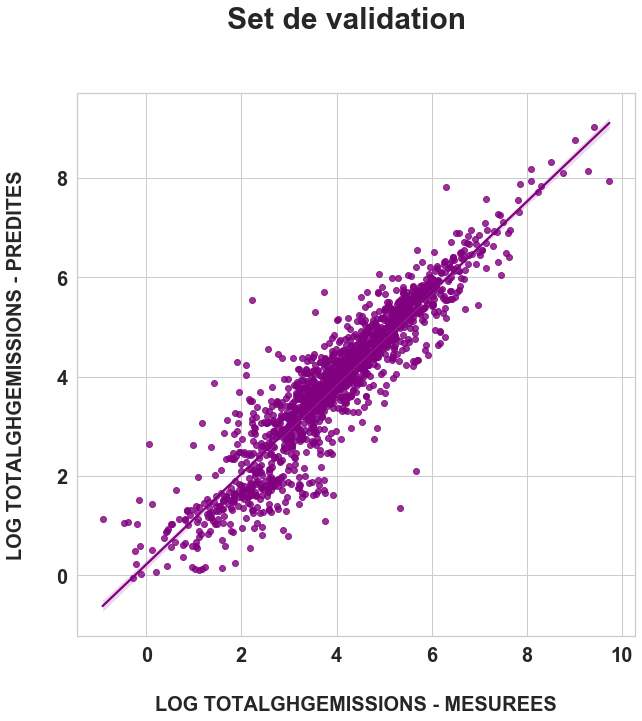

In [124]:
hf.plotRegplot(data_to_plot["Log TotalGHGEmissions - MESUREES"], 
            data_to_plot["Log TotalGHGEmissions - PREDITES"], 
            "Set de validation", 
            10, 10)

___
#### 2.7 ENERGY STAR SCORE

L'Energy Star Score fournit une indication de la performance énergétique d'un bâtiment donné par rapport aux autres bâtiments à travers le pays[1](https://portfoliomanager.zendesk.com/hc/en-us/articles/211697117-What-is-an-ENERGY-STAR-score-).

Calculé à partir de la consommation énergétique effective et de la consommation énergétique prévisionnelle de chaque bâtiment[2](https://portfoliomanager.zendesk.com/hc/en-us/articles/115000250031-How-is-my-score-calculated-), il ne peut être utilisé pour un modèle de prédiction qu'en utilisant le score de l'année N avec les données de l'année N+1.

C'est ce que nous allons faire ici. 
Étant donné que nous ne disposons que des données 2015 et 2016, il faut maximiser cet échantillon. Au lieu de diviser les données en entraînement et test, nous allons utiliser l'ensemble des données 2016, divisées en plusieurs folds, sur lesquels nous mesurerons les performances du modèle avec Energy Star Score.

Nous comparerons ensuite avec les résultats obtenus sur ces mêmes folds par notre modèle sans l'Energy Star Score.

___
##### _<u>2.7.1 Assemblage des données</u>_

In [125]:
# Données 2015

raw_data_2015 = pd.read_csv("./sources/2015-building-energy-benchmarking.csv", sep=",")

In [126]:
# Merge des données 2016 avec Energy Star Score 2015

full_data_set = raw_data_2015[["OSEBuildingID","ENERGYSTARScore"]]\
                .merge(validation_data, on="OSEBuildingID")\
                .rename(columns={"ENERGYSTARScore":"ENERGYSTARScore_2015"})

In [127]:
# Conserve uniquement les observations où l'Energy Star Score est renseigné

full_data_set = full_data_set[full_data_set["ENERGYSTARScore_2015"].notna()]

___
##### _<u>2.7.2 Entraînement et test sur les folds</u>_

In [128]:
# Instantiation de la dataframe pour stocker les performances
performances_df = pd.DataFrame(columns=["Modèle", "Repeat","Fold", 
                                        "RMSE", "R2", "R2 Ajusté", "Time"])

In [129]:
from sklearn.model_selection import KFold, RepeatedKFold

data = full_data_set[["Electricity(%)",
                      "PropertyGFABuilding(s)",
                      "LargestPropertyUseTypeGFA",
                      "ENERGYSTARScore_2015", 
                      "TotalGHGEmissions"] + LoAPUT_cols]

X = data.loc[:, data.columns != 'TotalGHGEmissions']
Y = np.log(data[["TotalGHGEmissions"]])


SPLITS = 5
REPEATS = 5

rkf = RepeatedKFold(n_splits=SPLITS, n_repeats=REPEATS, random_state=4)

fold_nb = 0
repeat_nb = 0

for train, test in rkf.split(X):
    
    # Séparation en X et Y
    
    # Le train set ne sera utilisé que pour le nouveau modèle 
    # avec ENERGYSTARScore
    X_train = X.iloc[train,:]
    Y_train = Y.iloc[train,:]
    
    X_test = X.loc[:, X.columns != 'ENERGYSTARScore_2015'].iloc[test,:]
    X_test_NRJSTARScore = X.iloc[test,:]
    
    Y_test = Y.iloc[test, :]

    
    # Test du modèle existant
    start_time = time.time()

    ypred = best_model.predict(X_test)
    
    elapsed_time = time.time() - start_time

    row = ["Initial", 
           repeat_nb,
           fold_nb, 
           np.sqrt(mean_squared_error(Y_test, ypred)), 
           r2_score(Y_test, ypred), 
           "-",
           elapsed_time]
    
    performances_df.loc[len(performances_df)]=row
    
    
    # Train et test du modèle avec EnergyStarScore
    rfr = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=4)
    rfr.fit(X_train, Y_train.values.ravel())

    start_time = time.time()

    ypred = rfr.predict(X_test_NRJSTARScore)
    
    elapsed_time = time.time() - start_time
    
    row = ["Avec ENERGY STAR Score", 
           repeat_nb,
           fold_nb, 
           np.sqrt(mean_squared_error(Y_test, ypred)), 
           r2_score(Y_test, ypred), 
           1 - (1-r2_score(Y_test, ypred))*(len(Y_test)-1)/(len(Y_test)-X_test_NRJSTARScore.shape[1]-1),
           elapsed_time]
    
    performances_df.loc[len(performances_df)]=row
    
    fold_nb += 1
    
    if fold_nb == SPLITS:
        fold_nb = 0
        repeat_nb += 1
    
# Row contenant la moyenne des RMSE et R2 pour le modèle initial
row = ["Initial", 
       "MEAN",
       "MEAN", 
       performances_df[performances_df["Modèle"]=="Initial"]["RMSE"].mean(),
       performances_df[performances_df["Modèle"]=="Initial"]["R2"].mean(), 
       "-",
       performances_df[performances_df["Modèle"]=="Initial"]["Time"].mean()]

performances_df.loc[len(performances_df)]=row

# Row contenant la moyenne des RMSE et R2 pour le modèle initial
row = ["Avec ENERGY STAR Score", 
       "MEAN", 
       "MEAN",
       performances_df[performances_df["Modèle"]=="Avec ENERGY STAR Score"]["RMSE"].mean(),
       "-", 
       performances_df[performances_df["Modèle"]=="Avec ENERGY STAR Score"]["R2 Ajusté"].mean(),
       performances_df[performances_df["Modèle"]=="Avec ENERGY STAR Score"]["Time"].mean()]

performances_df.loc[len(performances_df)]=row

___
##### _<u>2.7.3 Comparaison des performances avec et sans Energy Star Score</u>_

In [130]:
performances_df

,Modèle,Repeat,Fold,RMSE,R2,R2 Ajusté,Time
0,Initial,0,0,0.489622,0.861341,-,0.058197
1,Avec ENERGY STAR Score,0,0,0.491154,0.860472,0.791203,0.080556
2,Initial,0,1,0.573039,0.850422,-,0.058756
3,Avec ENERGY STAR Score,0,1,0.586970,0.843061,0.764591,0.077188
4,Initial,0,2,0.534046,0.870889,-,0.055542
5,Avec ENERGY STAR Score,0,2,0.560705,0.857678,0.786516,0.077103
6,Initial,0,3,0.538006,0.853749,-,0.055260
7,Avec ENERGY STAR Score,0,3,0.543417,0.850793,0.776189,0.087977
8,Initial,0,4,0.537246,0.867371,-,0.059566
9,Avec ENERGY STAR Score,0,4,0.505984,0.882358,0.823536,0.077636


___
##### _<u>2.7.4 Conclusion sur l'utilité de l'Energy Star Score</u>_

L'utilisation de l'ENERGY Star Score a en moyenne : 
- un effet très légèrement mélioratif sur la RMSE (réduction d'environ 0.0001)
- un effet légèrement péjoratif sur le score R2 (baisse d'environ 0.07)
- un effet légèrement péjoratif sur le temps de calcul (augmentation d'environ 0.02s)

> **L'ENERGY Star Score ne permet donc pas d'obtenir de meilleures prédictions.**

____
### 3. CONCLUSION

**Prédiction de la consommation énergétique**

Le meilleur modèle obtenu dans cette étude donne les résultats suivants :
- sur les données test :
    - une RMSE de 0.67
    - un R2 de 0.67
    - un temps de calcul de 2.56s
- sur les données validation :
    - une RMSE de 0.56
    - un R2 de 0.81
    - un temps de calcul de 0.13s

**Prédiction des émissions de CO2**

Le meilleur modèle obtenu dans cette étude donne les résultats suivants : 
- sur les données test :
    - une RMSE de 0.71
    - un R2 de 0.73
    - un temps de calcul de 3.21s
- sur les données validation :
    - une RMSE de 0.61
    - un R2 de 0.83
    - un temps de calcul de 0.15s

**L'utilité de l'Energy Star Score**

Sur le jeu de données 2016 contenant uniquement les bâtiments ayant reçu un Energy Star Score :

- Le modèle initial sans Energy Star Score donne les résultats suivants :
    - une RMSE moyenne de 0.53
    - un score R2 moyen de 0.86
    - un temps de calcul moyen de 0.06s

- Le modèle avec Energy Star Score donne les résultats suivants :
    - une RMSE moyenne de 0.53
    - un score R2 moyen dde 0.79
    - un temps de calcul moyen de 0.08s

Inclure l'Energy Star Score n'a pas permis d'obtenir de meilleures performances pour la prédiction des émissions de carbone. 

____
### 4. ANNEXES

In [131]:
############### PROJET 4 #################

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from scipy import stats

##########################################
#                                        #
# Fonctions de calcul et de descriptions #
#                                        #
##########################################

def getPerformances(data_dict, y_col, r2_adjusted=None, std=None):
    '''
        Gives the performance in terms of RMSE, R2, adjusted R2 for
        the K Neighbors Regressor algorithm
        
        Parameters
        ----------------
        data_dict   : dict with :
                    - name of the input data as keys (string)
                    - input data as values (pandas dataframe)
                 
        y_col       : string
                      The name of the feature to predict
        
        r2_adjusted : bool
                      True if adjusted R2 should be adjusted
                
        Returns
        ---------------
        A tuple containing :
        - r2_rmse_time  : dataframne
                          The RMSE et R2 score values for each model
        - model_df      : dataframe
                          The associated Gini coeff for each column of
                          the given dataframe
    '''
    
    r2_rmse_time = pd.DataFrame()
    model_df = pd.DataFrame()

    for ajout_name, data_ajout in data_dict.items():
        
        xtrain, xtest, ytrain, ytest = train_test_split(
                                data_ajout.loc[:, data_ajout.columns != y_col],
                                data_ajout[[y_col]],
                                test_size=0.3)
                                
        if std == "standardized":
            # Standardisation des X
            std_scale = preprocessing.StandardScaler().fit(xtrain)
            X_train = std_scale.transform(xtrain)
            X_test = std_scale.transform(xtest)
        else:
            X_train = xtrain
            X_test = xtest
            
        ytrain_log = np.log(ytrain)
        ytest_log = np.log(ytest)

        parameters = [{'n_estimators': [100, 200, 500, 700, 1000]}]

        clf = GridSearchCV(RandomForestRegressor(), parameters)
    
        clf.fit(X_train, ytrain_log.values.ravel())

        model = RandomForestRegressor(n_estimators=clf.best_params_["n_estimators"],
                                   oob_score=True, random_state=4)
        
        start_time = time.time()

        model.fit(X_train, ytrain_log.values.ravel())
        ypred = model.predict(X_test)

        elapsed_time = time.time() - start_time

        model_df[ajout_name] = [model]
    
        r2_rmse_time.loc[ajout_name, "RMSE"] = np.sqrt(mean_squared_error(ytest_log, ypred))
        r2_rmse_time.loc[ajout_name, "R2"] = r2_score(ytest_log, ypred)
        
        if r2_adjusted==True:
            r2_rmse_time.loc[ajout_name, "R2 Ajusté"] = 1 - (1-r2_score(ytest_log, ypred))*(len(ytest_log)-1)/(len(ytest_log)-X_test.shape[1]-1)
        
        r2_rmse_time.loc[ajout_name, "Time"] = elapsed_time

    return r2_rmse_time, model_df

#------------------------------------------

def fitPredictPlot(algorithms, xtrain, xtrain_std, ytrain, xtest, xtest_std, ytest):
    '''
        For each given algorithms :
        - Trains it on (xtrain, ytrain)
        - Predicts the values for xtest
        - Calculate the RMSE and R2 score with ytest
        - Getst the calculation time
        
        It does the same for xtrain_std, ytrain, xtest_std, ytest.
        
        The function then plots for each algorithm and each type of input the predicted value
        as a function of the known value, and return the performance data for all models.
        
        Parameters
        ----------------
        algorithms  : dictionary with
                        - names and type of input as keys
                        - instantiated algorithms as values
        
        - xtrain    : pandas dataframe
                      x training data
        - xtrain_std: pandas dataframe
                      standardized x training data
        - ytrain    : pandas dataframe
                      y training data
        - ytrain_std: pandas dataframe
                      standardized y training data
        - xtest     : pandas dataframe
                      x test data
        - xtest_std : pandas dataframe
                      standardized x test data
        - ytest     : pandas dataframe
                      y test data
                
        Returns
        ---------------
        r2_rmse_time   : pandas dataframe containing the RMSE, R2 score and calculation time for
        each algorithm
-
    '''
    
    r2_rmse_time = pd.DataFrame()
    
    # Set up for the plot
    TITLE_SIZE = 45
    SUBTITLE_SIZE = 25
    TITLE_PAD = 1.05
    TICK_SIZE = 25
    TICK_PAD = 20
    LABEL_SIZE = 30
    LABEL_PAD = 30
    LEGEND_SIZE = 30
    LINE_WIDTH = 3.5

    nb_rows = 5
    nb_cols = 2

    f, axes = plt.subplots(nb_rows, nb_cols, figsize=(20, 40))
    f.suptitle("Performances des modèles", fontweight="bold", fontsize=TITLE_SIZE, y=TITLE_PAD)

    row = 0
    column = 0

    for algoname, algo in algorithms.items():

        if "std" in algoname:
            X_train = xtrain_std
            X_test = xtest_std
        else:
            X_train = xtrain
            X_test = xtest
        
            algo.fit(X_train, ytrain.values.ravel())
            
            start_time = time.time()

            ypred = algo.predict(X_test)
            
        elapsed_time = time.time() - start_time

        r2_rmse_time.loc[algoname, "RMSE"] = np.sqrt(mean_squared_error(ytest, ypred))
        r2_rmse_time.loc[algoname, "R2"] = r2_score(ytest, ypred)
        r2_rmse_time.loc[algoname, "Time"] = elapsed_time

        # plot
        ax = axes[row, column]

        b = sns.regplot(x=ytest, y=ypred, ax=ax)

        plt.tight_layout()
        
        plt.subplots_adjust(left=None,
                            bottom=None,
                            right=None,
                            top=None,
                            wspace=0.3, hspace=0.4)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))
        
        ax.set_xlabel('Valeur mesurée', fontsize=LABEL_SIZE, labelpad=LABEL_PAD)
        ax.set_ylabel('Valeur prédite', fontsize=LABEL_SIZE, labelpad=LABEL_PAD)
        
        b.set_xticklabels(b.get_xticks(), size = TICK_SIZE)

        b.set_yticklabels(b.get_yticks(), size = TICK_SIZE)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))

        extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
        scores = (r'$R^2={:.2f}$' + '\n' + r'$RMSE={:.2f}$').format(r2_score(ytest, ypred),
                np.sqrt(mean_squared_error(ytest, ypred)))
        
        
        ax.legend([extra], [scores], loc='upper left', fontsize=LEGEND_SIZE)
        title = algoname + '\n Évaluation en {:.2f} secondes'.format(elapsed_time)
        ax.set_title(title, fontsize=SUBTITLE_SIZE, fontweight="bold")
        
            
        if column < nb_cols-1:
            column += 1
        else:
            row += 1
            column = 0
            
    return r2_rmse_time
 
##########################################
#                                        #
# Fonctions de graphiques                #
#                                        #
##########################################

def plotRegplot(data_x, data_y, title, long, larg):
    '''
        Plots a regression plot of the columns col_y and
        col_x in data
        
        Parameters
        ----------------
        - data  : dataframe
                  Working data containing the col_x and col_y columns
        - col_x : string
                  the name of a column present in data
        - col_y : string
                  the name of a column present in data
        - title : string
                  the title of the figure
        - long  : int
                  the length of the figure
        - larg  : int
                  the widht of the figure
        
        Returns
        ---------------
        _
    '''

    TITLE_SIZE = 30
    TITLE_PAD = 1
    TICK_SIZE = 20
    TICK_PAD = 20
    LABEL_SIZE = 20
    LABEL_PAD = 30
    LINE_WIDTH = 3.5
    LEGEND_SIZE = 30

    sns.set(style="whitegrid")

    sns.set_palette(sns.dark_palette("purple", reverse=True))

    plt.rcParams["font.weight"] = "bold"

    plt.rc('font', size=LABEL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=LABEL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=LABEL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=TITLE_SIZE)

    f, ax = plt.subplots(figsize=(long, larg))

    f.suptitle(title,
              fontweight="bold",
              fontsize=TITLE_SIZE, y=TITLE_PAD)

    b = sns.regplot(x=data_x, y=data_y)

    lx = ax.get_xlabel()
    ax.set_xlabel(lx.upper(), fontsize=LABEL_SIZE, labelpad=LABEL_PAD, fontweight="bold")
        
    ly = ax.get_ylabel()
    ax.set_ylabel(ly.upper(), fontsize=LABEL_SIZE, labelpad=LABEL_PAD, fontweight="bold")

    plt.show()
    
#------------------------------------------

def plot2Distplots(col_x1, label_col_x1, col_x2, label_col_x2, long, larg, title):
    '''
        Plots 2 distplots horizontally in a single figure
        
        Parameters
        ----------------
        col_x1          : pandas series
                          The data to use for x in the 1st distplot
                   
        label_col_x1    : string
                          The label for x in the 1st distplot
        
        col_x2          : pandas series
                          The data to use for x in the 2nd distplot
        
        label_col_x2    : string
                          The label for x in the 2nd distplot
        
        long            : int
                          The length of the figure for the plot
        
        larg            : int
                          The width of the figure for the plot
                
        title           : string
                          The title for the plot
        
        Returns
        ---------------
        -
    '''
        
    TITLE_SIZE = 30
    TITLE_PAD = 1.05
    TICK_SIZE = 15
    TICK_PAD = 20
    LABEL_SIZE = 20
    LABEL_PAD = 30
    LEGEND_SIZE = 30
    LINE_WIDTH = 3.5

    sns.set_palette(sns.dark_palette("purple", reverse="True"))

    f, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(long, larg))

    f.suptitle(title, fontweight="bold",
               fontsize=TITLE_SIZE, y=TITLE_PAD)

    sns.despine(left=True)

    b = sns.distplot(col_x1, ax=ax1)

    b.set_xticklabels(b.get_xticks(), size = TICK_SIZE)
    b.set_xlabel(label_col_x1,fontsize=LABEL_SIZE, labelpad=LABEL_PAD, fontweight="bold")

    c = sns.distplot(col_x2, ax=ax2)

    c.set_xticklabels(b.get_xticks(), size = TICK_SIZE)
    c.set_xlabel(label_col_x2,fontsize=LABEL_SIZE, labelpad=LABEL_PAD, fontweight="bold")

    plt.setp((ax1, ax2), yticks=[])
    plt.setp((ax1, ax2), xticks=[])


    plt.tight_layout()